# Análise do Perfil do Cliente
____________________

Conhecer o perfil do cliente é fundamental para traçar estratégias e atrair os consumidores certos para o seu negócio. Além disso, uma análise do perfil do cliente bem-feita ajuda uma empresa a entender melhor seus consumidores, tornando mais fácil modificar produtos e serviços de acordo com as necessidades, comportamentos e preocupações específicos dos diferentes tipos de clientes.

Uma empresa pode modificar seus produtos ou serviços com base no público-alvo de cada segmento de clientes. Por exemplo, em vez de gastar dinheiro para comercializar um novo produto para todos os clientes, uma empresa pode analisar qual segmento de clientes tem maior probabilidade de comprar o produto e, em seguida, comercializar o produto apenas naquele segmento específico, aumentando, desta forma, a assertividade das ações de marketing e vendas.

## Projeto
__________________________
Realizar uma análise do perfil do cliente utilizando o Dataset Customer Personality Analysis fornecido pelo Kaggle. Por meio desta análise pretendo explorar alguns conceitos que um cientista de dados precisa saber para o bom desenpenho de suas atividades.

Desta forma, vou demonstrar a aplicação de algumas técnicas de pré-processamento, análise exploratória dos dados, classificação, agrupamento (clusterização) e finalizando com a avaliação dos conhecimentos descobertos na base de dados.

## Bibliotecas utilizadas
_____________________


As principais bibliotecas da linguagem Python utilizadas neste projeto foram:

<ul>
<li><b>Numpy:</b> manipulação de arrays e seus cálculos numéricos;</li>
<li><b>Pandas:</b> manipulação da base de dados;</li>
<li><b>Matplotlib e Seaborn:</b> criação de gráficos estáticos;</li>
<li><b>Plotly:</b> criação de gráficos interativos;</li>
<li><b>Scikit-Learn:</b> criação de modelos de Machine Learning.</li>
<ul>

Então vamos começar?

## Conhecendo a Base de Dados
__________________________

A base de dados contém: 2.240 linhas e 29 colunas. Os 29 atributos podem ser divididos em 4 grupos:

<b>Cliente</b>

ID: Identificador único do cliente.<br>
Year_Birth: Ano de nascimento.<br>
Education: Nível de escolaridade.<br>
Marital_Status: Estado civil.<br>
Income: Renda familiar anual.<br>
Kidhome: Número de crianças em casa.<br>
Teenhome: Número de adolescente em casa.<br>
Dt_Customer: Data em que se tornou cliente.<br>
Recency: Número de dias desde a última compra.<br>
Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.<br>

<b>Produtos</b>

MntWines: Quantia gasta em vinho nos últimos 2 anos.<br>
MntFruits: Quantia gasta em frutas nos últimos 2 anos.<br>
MntMeatProducts: Quantia gasta em carne nos últimos 2 anos.<br>
MntFishProducts: Quantia gasta em peixe nos últimos 2 anos.<br>
MntSweetProducts: Quantia gasta em doces nos últimos 2 anos.<br>
MntGoldProds: Quantia gasta em produtos GOLD nos últimos 2 anos.<br>

<b>Promoções</b>

NumDealsPurchases: Quantidade de compras feitas com desconto.<br>
AcceptedCmp1: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário.<br>
AcceptedCmp2: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário.<br>
AcceptedCmp3: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário.<br>
AcceptedCmp4: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário.<br>
AcceptedCmp5: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário.<br>
Response: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário.<br>

<b>Canais de Vendas</b>

NumWebPurchases: Número de compras feitas por meio do site da empresa.<br>
NumCatalogPurchases: Número de compras feitas usando um catálogo.<br>
NumStorePurchases: Número de compras feitas diretamente nas lojas.<br>
NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.<br>


In [261]:
## Importanto as bibliotecas

import pandas as pd
import missingno as mn
import seaborn as sns
from matplotlib import pyplot as plt

## Importando os dados

dataFrame = pd.read_csv('marketing_campaign.csv', sep = "\t")
df = dataFrame.copy() ## Criando uma cópia do Dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [262]:
df.shape

(2240, 29)

In [263]:
df.shape

print('Qtd Linha: ', df.shape[0] )
print('Qtd Coluna: ', df.shape[1])

Qtd Linha:  2240
Qtd Coluna:  29


### 1. Pré-processamento da base de dados
_______________

#### 1.1. Verificando se a base possui muitos valores nulos

Conforme abaixo, podemos observar que praticamente não há valores nulos na base de dados, os valores nulos aparecem somente para o atributo Income (Renda familiar anual) em um percentual de 1,07% dos objetos.

In [264]:
def missing_data(df):
    
    Nulos = df.isnull().sum().sort_values(ascending = False)
    Percentual = (Nulos/df.shape[0]*100).sort_values(ascending = False)
    
    return pd.concat([Nulos, Percentual], axis=1, keys=['Nulos', 'Percentual'])

missing_data(df)

,Nulos,Percentual
Income,24,1.071429
ID,0,0.000000
NumDealsPurchases,0,0.000000
Z_Revenue,0,0.000000
Z_CostContact,0,0.000000
Complain,0,0.000000
AcceptedCmp2,0,0.000000
AcceptedCmp1,0,0.000000
AcceptedCmp5,0,0.000000
AcceptedCmp4,0,0.000000


#### 1.2. Visualizando os valores nulos no dataset

Missingno é uma excelente biblioteca Python para visualizarmos e entendermos a presença e distribuição de dados ausentes em um dataframe do pandas. A partir de gráficos, podemos identificar onde ocorrem os valores ausentes, a extensão da ausência e se algum dos valores ausentes está correlacionado entre si. Os valores ausentes podem ser vistos como não contribuindo com nenhuma informação, mas se analisados de perto, pode haver uma história subjacente.

<AxesSubplot:>

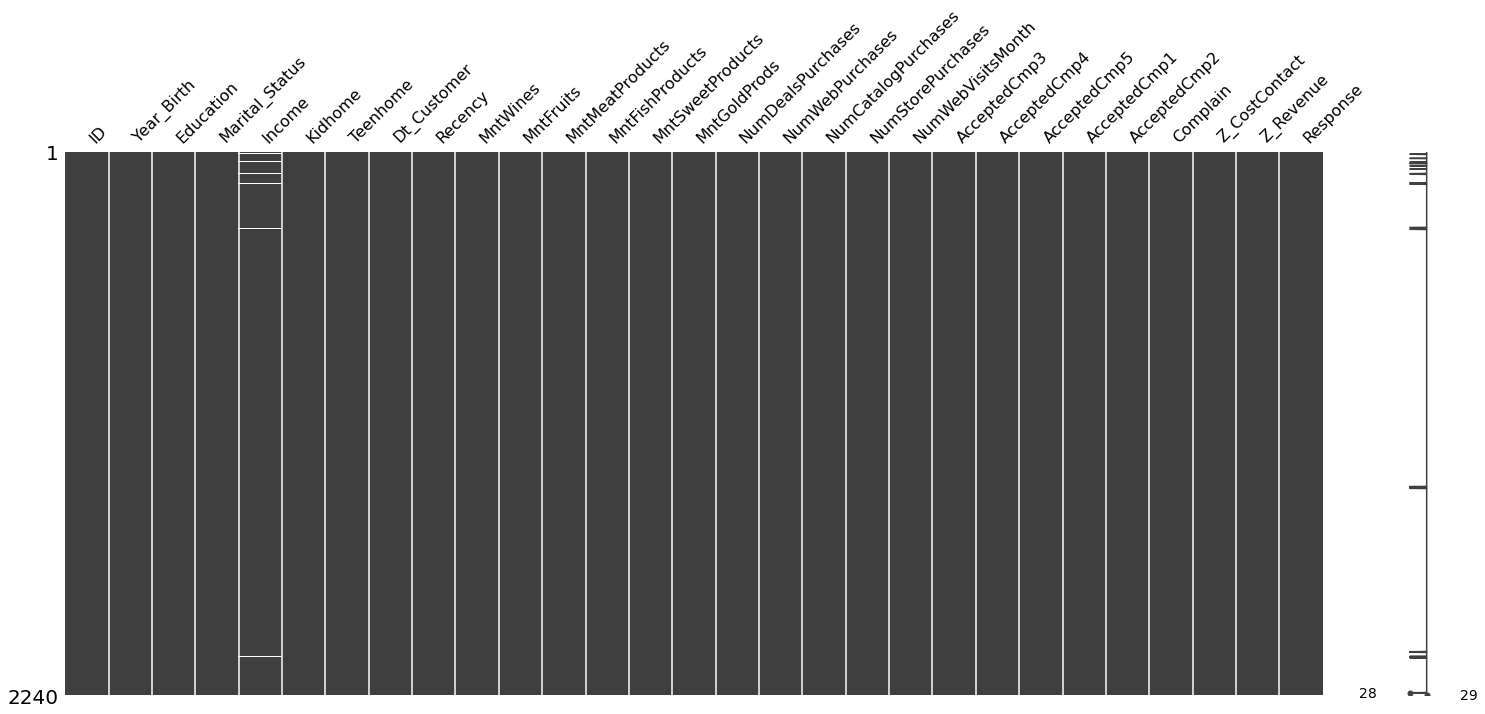

In [265]:
mn.matrix(df)

#### 1.3. Analisando as estatísticas básicas do dataset

In [266]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


#### 1.4. Preenchendo os valores nulos pela média do atributo

In [267]:
df['Income']=df['Income'].fillna(df['Income'].median())

# Verificando se ainda existe algum valor nulo
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

#### 1.5. Verificando se existe alguma linha duplicata

In [268]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


#### 1.6. Verificando se existe alguma colunas com valores únicos

Conforme abaixo as colunas 'Z_Revenue' e 'Z_CostContact' possuem o mesmo valor para todas as linhas, então elas devem ser removidas já que ela não vão contribuir em nada na construção do modelo.

In [269]:
df.nunique().sort_values()

Z_Revenue                 1
Z_CostContact             1
Response                  2
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp2              2
Complain                  2
AcceptedCmp1              2
AcceptedCmp5              2
Kidhome                   3
Teenhome                  3
Education                 5
Marital_Status            8
NumCatalogPurchases      14
NumStorePurchases        14
NumDealsPurchases        15
NumWebPurchases          15
NumWebVisitsMonth        16
Year_Birth               59
Recency                 100
MntFruits               158
MntSweetProducts        177
MntFishProducts         182
MntGoldProds            213
MntMeatProducts         558
Dt_Customer             663
MntWines                776
Income                 1975
ID                     2240
dtype: int64

In [270]:
# Removendo as colunas de valores únicos

df = df.drop(columns=["Z_Revenue", "Z_CostContact"], axis=1)
df.shape

(2240, 27)

### 2. Analisando as variáveis do grupo clientes
_____________________________

#### 2.1. Ano de aniversário - faixa etária dos clientes

In [271]:
df["Year_Birth"].value_counts()

1976    89
1971    87
1975    83
1972    79
1970    77
1978    77
1973    74
1965    74
1969    71
1974    69
1956    55
1979    53
1958    53
1977    52
1952    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1963    45
1982    45
1967    44
1962    44
1951    43
1957    43
1986    42
1983    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1949    30
1989    30
1988    29
1950    29
1987    27
1948    21
1990    18
1947    16
1946    16
1991    15
1992    13
1945     8
1943     7
1944     7
1995     5
1993     5
1994     3
1996     2
1900     1
1941     1
1899     1
1940     1
1893     1
Name: Year_Birth, dtype: int64

Calculando a idade dos clientes

In [272]:
df['idade_cliente'] = pd.Timestamp('now').year - df["Year_Birth"]
df['idade_cliente'] 

0       64
1       67
2       56
3       37
4       40
        ..
2235    54
2236    75
2237    40
2238    65
2239    67
Name: idade_cliente, Length: 2240, dtype: int64

In [273]:
df['idade_cliente'].describe()

count    2240.000000
mean       52.194196
std        11.984069
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max       128.000000
Name: idade_cliente, dtype: float64

In [274]:
df["idade_cliente"].value_counts()

45     89
50     87
46     83
49     79
43     77
51     77
48     74
56     74
52     71
47     69
65     55
63     53
42     53
44     52
69     52
53     51
62     51
67     50
55     50
61     49
66     49
39     45
58     45
54     44
59     44
70     43
64     43
57     42
38     42
35     42
41     39
40     39
37     38
60     36
68     35
36     32
32     30
72     30
33     29
71     29
34     27
73     21
31     18
75     16
74     16
30     15
29     13
76      8
77      7
78      7
26      5
28      5
27      3
25      2
81      1
128     1
122     1
80      1
121     1
Name: idade_cliente, dtype: int64

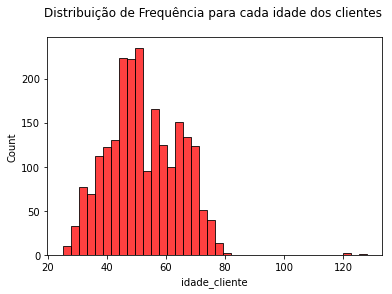

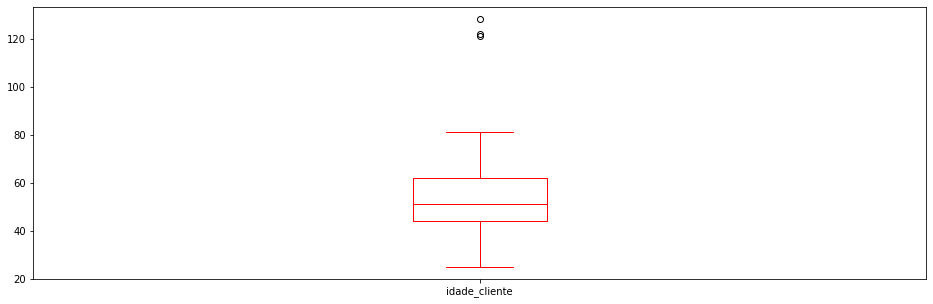

In [275]:
sns.histplot(df["idade_cliente"], color = 'red')
plt.title("Distribuição de Frequência para cada idade dos clientes \n")
plt.show()

df["idade_cliente"].plot.box(figsize=(16,5), color = 'red')
plt.show()

Aqui podemos observar que existem 3 outliers, ou seja, 3 clientes com idades de 121, 122 e 128 anos. Essas informações podem ser excluídas para o cálculo da idade média dos clientes.

In [276]:
df_sem_outliers = df[~df['idade_cliente'].isin([121, 122, 128])]
df_sem_outliers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,idade_cliente
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,4,7,0,0,0,0,0,0,1,64
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,5,0,0,0,0,0,0,0,67
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,10,4,0,0,0,0,0,0,0,56
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,4,6,0,0,0,0,0,0,0,37
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,6,5,0,0,0,0,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,4,5,0,0,0,0,0,0,0,54
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,5,7,0,0,0,1,0,0,0,75
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,13,6,0,1,0,0,0,0,0,40
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,10,3,0,0,0,0,0,0,0,65


In [277]:
df_sem_outliers['idade_cliente'].mean()

52.098345999105945

Podemos observar que mesmo excluindo-se os outliers a idade média dos clientes permanecem em 52 anos.

#### 2.2. Antiguidade dos clientes

In [278]:
# Convertendo dt_customer para timestamp
df["Dt_Customer"] = pd.to_datetime(df.Dt_Customer)
df["Antiguidade"] = pd.Timestamp('now').year - df["Dt_Customer"].dt.year
df["Antiguidade"].value_counts()

8    1189
7     557
9     494
Name: Antiguidade, dtype: int64

Text(0.5, 0, 'Antigudade dos clientes em anos (Antiguidade)')

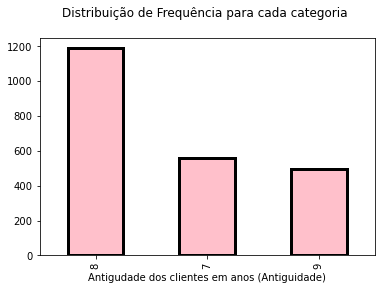

In [279]:
df['Antiguidade'].value_counts().plot(kind='bar', color = 'pink', edgecolor = "black", linewidth = 3)
plt.title("Distribuição de Frequência para cada categoria \n")
plt.xlabel('Antigudade dos clientes em anos (Antiguidade)')

In [280]:
anos = df["Antiguidade"].value_counts().keys().tolist()
qtd_clientes = df["Antiguidade"].value_counts().tolist()
total = sum(qtd_clientes)

print('Agora sabemos que:\n')

i = 0
for ano in anos:
    print (round((qtd_clientes[i]/total)*100, 2), '% são clientes a', ano, 'anos')
    i += 1

Agora sabemos que:

53.08 % são clientes a 8 anos
24.87 % são clientes a 7 anos
22.05 % são clientes a 9 anos


#### 2.3. Escolaridade

In [281]:
df["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Text(0.5, 1.0, 'Distribuição de Frequência para cada categoria do atributo Education (Escolaridade) \n')

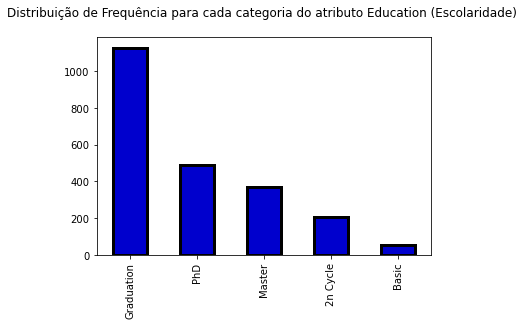

In [282]:
df['Education'].value_counts().plot(kind='bar', color = 'mediumblue', edgecolor = "black", linewidth = 3)
plt.title("Distribuição de Frequência para cada categoria do atributo Education (Escolaridade) \n")

Reduzindo a quantidade de categorias para o atributo Escolaridade

In [283]:
df['Education'] = df['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'Nível Superior')  
df['Education'] = df['Education'].replace(['Basic'], 'Nível Médio')

df["Education"].value_counts()

Nível Superior    2186
Nível Médio         54
Name: Education, dtype: int64

Text(0.5, 1.0, 'Distribuição de Frequência para cada categoria do atributo Education (Escolaridade) \n')

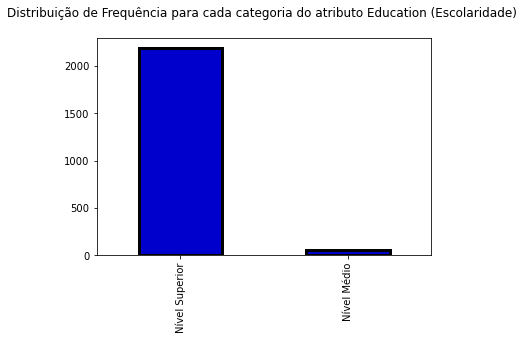

In [284]:
df['Education'].value_counts().plot(kind='bar', color = 'mediumblue', edgecolor = "black", linewidth = 3)
plt.title("Distribuição de Frequência para cada categoria do atributo Education (Escolaridade) \n")

In [285]:
df['Education'].value_counts()

Nível Superior    2186
Nível Médio         54
Name: Education, dtype: int64

In [286]:
n_sup = df['Education'].value_counts()[0]
n_med = df['Education'].value_counts()[1]
total = n_sup + n_med

print('Agora sabemos que', round((n_sup/total)*100, 2), '% dos clientes possuem Nível Superior enquanto que', 
      round((n_med/total)*100, 2), '% dos clientes possuem Nível Médio')


Agora sabemos que 97.59 % dos clientes possuem Nível Superior enquanto que 2.41 % dos clientes possuem Nível Médio


#### 2.4. Estado civil

In [287]:
df["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Text(0.5, 1.0, 'Distribuição de Frequência para cada categoria do atributo Marital_Status (Estado Civil) \n')

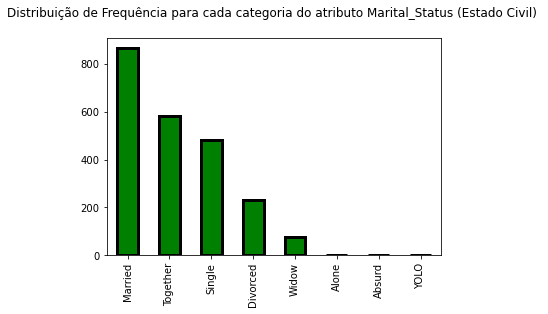

In [288]:
df['Marital_Status'].value_counts().plot(kind='bar', color = 'green', edgecolor = "black", linewidth = 3)
plt.title("Distribuição de Frequência para cada categoria do atributo Marital_Status (Estado Civil) \n")

In [289]:
# Reduzindo a quantidade de categorias para o atributo Estado Civil e resolvendo problemas de preenchimento

df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'],'Em relacionamento')
df['Marital_Status'] = df['Marital_Status'].replace(['Single', 'Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Solteiro')

df["Marital_Status"].value_counts()

Em relacionamento    1444
Solteiro              796
Name: Marital_Status, dtype: int64

Text(0.5, 1.0, 'Distribuição de Frequência para cada categoria do atributo Marital_Status (Estado Civil) \n')

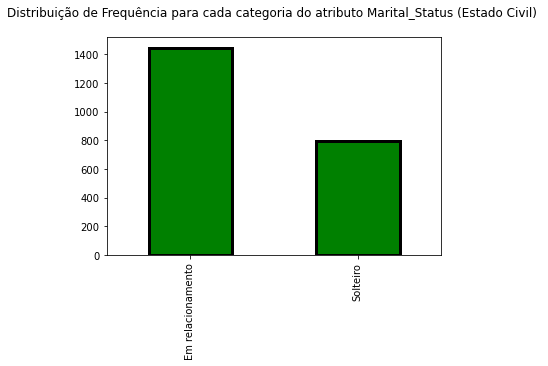

In [290]:
df['Marital_Status'].value_counts().plot(kind='bar', color = 'green', edgecolor = "black", linewidth = 3)
plt.title("Distribuição de Frequência para cada categoria do atributo Marital_Status (Estado Civil) \n")

In [291]:
em_Rel = df['Marital_Status'].value_counts()[0]
sol = df['Marital_Status'].value_counts()[1]
total = em_Rel + sol

print('Agora sabemos que', round((em_Rel/total)*100, 2), '% dos clientes estão em relacionamento enquanto que', 
      round((sol/total)*100, 2), '% dos clientes estão solteiros')

Agora sabemos que 64.46 % dos clientes estão em relacionamento enquanto que 35.54 % dos clientes estão solteiros


#### 2.5. Renda Familiar Anual

In [292]:
df['Income'].describe()

count      2240.000000
mean      52237.975446
std       25037.955891
min        1730.000000
25%       35538.750000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

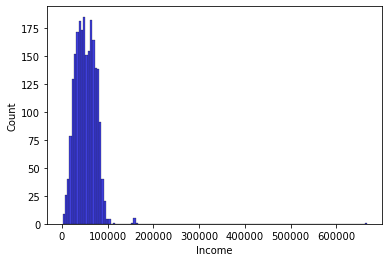

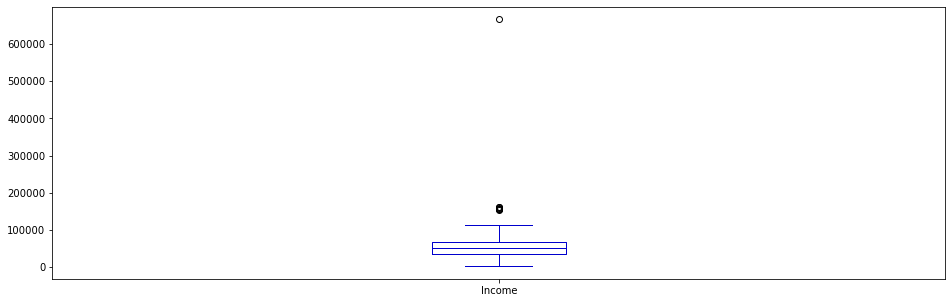

In [293]:
sns.histplot(df["Income"],color = 'Mediumblue')
plt.show()

df["Income"].plot.box(figsize=(16,5),color = 'MediumBlue')
plt.show()

Aqui podemos observar 1 outlier bem discrepante dos demais, vou excluí-lo para recalcular as estatísticas básicas.

In [294]:
df_sem_outliers = df[df['Income']!=666666]
df_sem_outliers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,idade_cliente,Antiguidade
0,5524,1957,Nível Superior,Solteiro,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,1,64,9
1,2174,1954,Nível Superior,Solteiro,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,0,67,7
2,4141,1965,Nível Superior,Em relacionamento,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,0,56,8
3,6182,1984,Nível Superior,Em relacionamento,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,0,37,7
4,5324,1981,Nível Superior,Em relacionamento,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,0,40,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Nível Superior,Em relacionamento,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,0,54,8
2236,4001,1946,Nível Superior,Em relacionamento,64014.0,2,1,2014-10-06,56,406,...,7,0,0,0,1,0,0,0,75,7
2237,7270,1981,Nível Superior,Solteiro,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,0,40,7
2238,8235,1956,Nível Superior,Em relacionamento,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,0,65,7


In [295]:
df_sem_outliers['Income'].describe()

count      2239.000000
mean      51963.554712
std       21410.672116
min        1730.000000
25%       35533.500000
50%       51381.500000
75%       68277.500000
max      162397.000000
Name: Income, dtype: float64

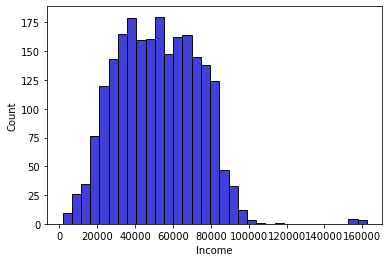

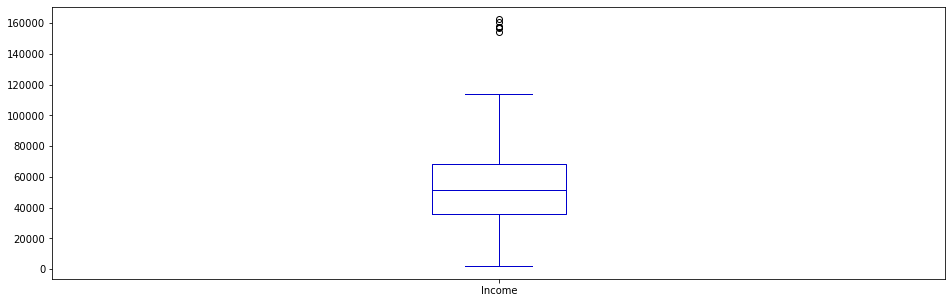

In [296]:
sns.histplot(df_sem_outliers["Income"],color = 'Mediumblue')
plt.show()

df_sem_outliers["Income"].plot.box(figsize=(16,5),color = 'MediumBlue')
plt.show()

#### 2.6. Número de crianças e adolescente

In [297]:
df["Kidhome"].value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

Text(0.5, 1.0, 'Distribuição de Frequência para cada categoria do atributo Kidhome (Número de Crianças) \n')

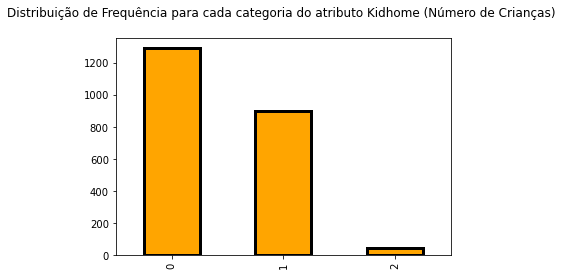

In [298]:
df['Kidhome'].value_counts().plot(kind='bar', color = 'orange', edgecolor = "black", linewidth = 3)
plt.title("Distribuição de Frequência para cada categoria do atributo Kidhome (Número de Crianças) \n")

In [299]:
df["Teenhome"].value_counts()

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

Text(0.5, 1.0, 'Distribuição de Frequência para cada categoria do atributo Teenhome (Número de Adolescente) \n')

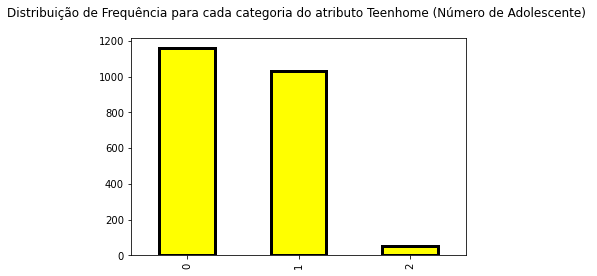

In [300]:
df['Teenhome'].value_counts().plot(kind='bar', color = 'yellow', edgecolor = "black", linewidth = 3)
plt.title("Distribuição de Frequência para cada categoria do atributo Teenhome (Número de Adolescente) \n")

Criando a dimensão 'Dependentes' para reunir as dimensões 'Crianças' e 'Adolescente'

In [301]:
df['Dependentes'] = df['Kidhome'] + df['Teenhome']

In [302]:
df["Dependentes"].value_counts().sort_values(ascending = False)

1    1128
0     638
2     421
3      53
Name: Dependentes, dtype: int64

Text(0.5, 1.0, 'Distribuição de Frequência para cada categoria do atributo Dependentes (Número de Crianças e Adolescentes) \n')

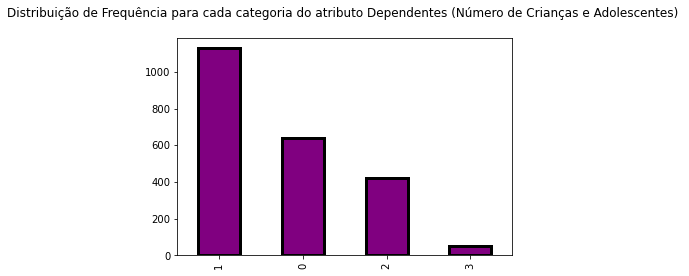

In [303]:
df['Dependentes'].value_counts().plot(kind='bar', color = 'purple', edgecolor = "black", linewidth = 3)
plt.title("Distribuição de Frequência para cada categoria do atributo Dependentes (Número de Crianças e Adolescentes) \n")

In [304]:
dep0 = df['Dependentes'].value_counts()[0]
dep1 = df['Dependentes'].value_counts()[1]
dep2 = df['Dependentes'].value_counts()[2]
dep3 = df['Dependentes'].value_counts()[3]
total = dep0 + dep1 + dep2 + dep3

print('Agora sabemos que:\n')
print (round((dep0/total)*100, 2), '% dos clientes não possuem dependentes')
print (round((dep1/total)*100, 2), '% dos clientes possuem apenas 1 dependente')
print (round((dep2/total)*100, 2), '% dos clientes possuem 2 dependentes')
print (round((dep3/total)*100, 2), '% dos clientes possuem 3 dependentes')
      

Agora sabemos que:

28.48 % dos clientes não possuem dependentes
50.36 % dos clientes possuem apenas 1 dependente
18.79 % dos clientes possuem 2 dependentes
2.37 % dos clientes possuem 3 dependentes


#### 2.7. Analisando as reclamações dos clientes

In [305]:
df["Complain"].value_counts()

0    2219
1      21
Name: Complain, dtype: int64

In [306]:
n_rec = df['Complain'].value_counts()[1]
total = sum(df['Complain'].value_counts().tolist())

print('Agora sabemos que apenas', round((n_rec/total)*100, 2), '% dos clientes reclamaram nos últimos 2 anos.')

Agora sabemos que apenas 0.94 % dos clientes reclamaram nos últimos 2 anos.


Seria interessante traçar o perfil dos clientes que reclamam, mas essa análise vai ficar para outro momento, ok?

In [307]:
df.loc[df['Complain'] == 1]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,idade_cliente,Antiguidade,Dependentes
78,10401,1976,Nível Superior,Em relacionamento,26326.0,0,0,2013-04-09,12,1,...,0,0,0,0,0,1,0,45,8,0
147,3120,1981,Nível Superior,Em relacionamento,38547.0,1,0,2013-08-28,49,6,...,0,0,0,0,0,1,0,40,8,1
192,7829,1900,Nível Superior,Solteiro,36640.0,1,0,2013-09-26,99,15,...,0,0,0,0,0,1,0,121,8,1
271,5726,1983,Nível Superior,Solteiro,31788.0,1,0,2014-03-20,15,16,...,0,0,0,0,0,1,0,38,7,1
355,6201,1978,Nível Superior,Solteiro,38643.0,1,1,2013-11-29,45,22,...,0,0,0,0,0,1,0,43,8,2
358,6142,1943,Nível Superior,Em relacionamento,65073.0,0,0,2013-08-20,65,629,...,0,0,0,0,0,1,0,78,8,0
590,3710,1984,Nível Superior,Solteiro,39684.0,1,0,2012-12-10,41,19,...,0,0,0,0,0,1,1,37,9,1
972,10995,1988,Nível Superior,Em relacionamento,15716.0,1,0,2012-12-11,8,16,...,0,0,0,0,0,1,0,33,9,1
1041,6730,1954,Nível Superior,Em relacionamento,38998.0,1,1,2012-03-11,92,34,...,0,0,0,0,0,1,0,67,9,2
1069,2875,1978,Nível Superior,Em relacionamento,67023.0,0,0,2014-04-03,93,444,...,0,0,0,0,0,1,0,43,7,0


In [308]:
df.loc[df['Complain'] == 1].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,idade_cliente,Antiguidade,Dependentes
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,...,21.000000,21.0,21.000000,21.0,21.0,21.0,21.000000,21.000000,21.000000,21.000000
mean,6722.714286,1965.095238,45242.285714,0.666667,0.523810,53.047619,169.000000,24.190476,112.476190,25.761905,...,0.095238,0.0,0.047619,0.0,0.0,1.0,0.142857,55.904762,8.142857,1.190476
std,3314.618170,20.916273,19223.158027,0.577350,0.601585,28.522756,208.770209,38.367459,159.926114,37.993295,...,0.300793,0.0,0.218218,0.0,0.0,0.0,0.358569,20.916273,0.654654,0.813575
min,255.000000,1900.000000,15716.000000,0.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,1.0,0.000000,26.000000,7.000000,0.000000
25%,4427.000000,1954.000000,36640.000000,0.000000,0.000000,31.000000,16.000000,1.000000,14.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,1.0,0.000000,42.000000,8.000000,1.000000
50%,6742.000000,1964.000000,38998.000000,1.000000,0.000000,49.000000,34.000000,6.000000,30.000000,7.000000,...,0.000000,0.0,0.000000,0.0,0.0,1.0,0.000000,57.000000,8.000000,1.000000
75%,9500.000000,1979.000000,58113.000000,1.000000,1.000000,77.000000,290.000000,27.000000,169.000000,38.000000,...,0.000000,0.0,0.000000,0.0,0.0,1.0,0.000000,67.000000,9.000000,2.000000
max,10995.000000,1995.000000,83257.000000,2.000000,2.000000,99.000000,629.000000,137.000000,590.000000,104.000000,...,1.000000,0.0,1.000000,0.0,0.0,1.0,1.000000,121.000000,9.000000,3.000000


### 3. Analisando as variáveis do grupo produtos
__________  

#### 3.1. Total de compras por cliente nos últimos 2 anos

In [309]:
df.iloc[:,9:15]

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


In [310]:
df.iloc[:,9:15].columns

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds'],
      dtype='object')

Criando a dimensão Total de Compras

In [311]:
df['TotalCompras'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalCompras'].head(10)

0    1617
1      27
2     776
3      53
4     422
5     716
6     590
7     169
8      46
9      49
Name: TotalCompras, dtype: int64

In [312]:
df['TotalCompras'].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: TotalCompras, dtype: float64

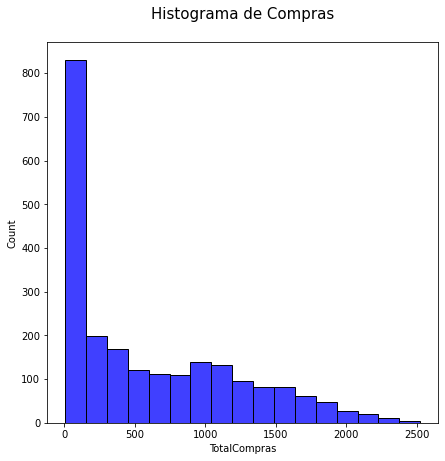

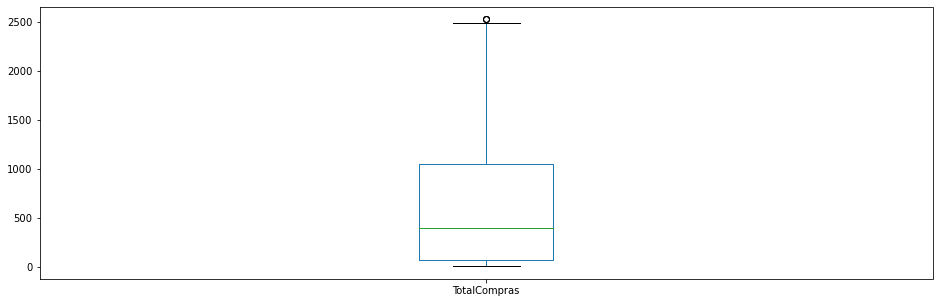

In [313]:
fig1, ax1 = plt.subplots(figsize=(7,7))

sns.histplot(df["TotalCompras"],color = 'blue')
ax1.set_title("Histograma de Compras\n", fontdict={'fontsize':15})
plt.show()

df["TotalCompras"].plot.box(figsize=(16,5))
plt.show()

Podemos observar que o gasto médio em compras é em torno de 600,00

#### 3.2. Total gasto em cada produto nos 2 últimos anos

In [315]:
produtos = df.iloc[:,9:15].columns
produtos

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds'],
      dtype='object')

In [316]:
Total_vinho = df['MntWines'].sum()
print(f'Total gasto em vinhos: {Total_vinho:,.2f}')

Total gasto em vinhos: 680,816.00


In [317]:
Total_frutas = df['MntFruits'].sum()
print(f'Total gasto em frutas: {Total_frutas:,.2f}')

Total gasto em frutas: 58,917.00


In [318]:
Total_carnes = df['MntMeatProducts'].sum()
print(f'Total gasto em carnes: {Total_carnes:,.2f}')

Total gasto em carnes: 373,968.00


In [319]:
Total_peixes = df['MntFishProducts'].sum()
print(f'Total gasto em peixes: {Total_peixes:,.2f}')

Total gasto em peixes: 84,057.00


In [320]:
Total_doces = df['MntSweetProducts'].sum()
print(f'Total gasto em doces: {Total_doces:,.2f}')

Total gasto em doces: 60,621.00


In [321]:
Total_prodOuro = df['MntGoldProds'].sum()
print(f'Total gasto em produtos ouro: {Total_prodOuro:,.2f}')

Total gasto em produtos ouro: 98,609.00


In [322]:
lista_total = [Total_vinho, Total_frutas, Total_carnes, Total_peixes, Total_doces, Total_prodOuro]

In [323]:
lista_total

[680816, 58917, 373968, 84057, 60621, 98609]

In [324]:
lista_gostos = list(zip(produtos, lista_total))

df_gosto_por_prod = pd.DataFrame(lista_gostos, columns=['Produto', 'Total_Gasto'])
df_gosto_por_prod

,Produto,Total_Gasto
0,MntWines,680816
1,MntFruits,58917
2,MntMeatProducts,373968
3,MntFishProducts,84057
4,MntSweetProducts,60621
5,MntGoldProds,98609


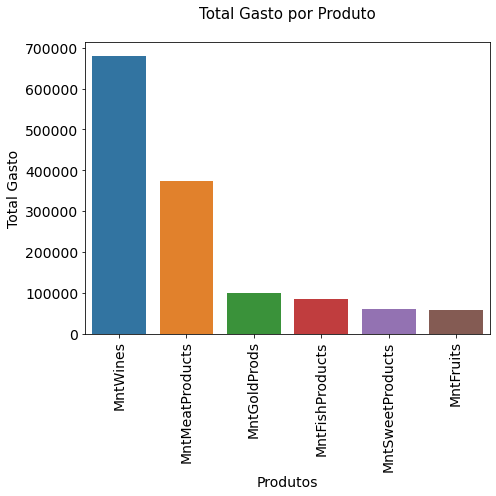

In [325]:
fig2, ax2 = plt.subplots(figsize=(7,7))

sns.barplot(x='Produto', y="Total_Gasto", data = df_gosto_por_prod, 
            order = df_gosto_por_prod.sort_values('Total_Gasto', ascending = False).Produto)

ax2.set_title("Total Gasto por Produto\n", fontdict={'fontsize':15})
ax2.set_xlabel('Produtos', fontdict={'fontsize':14})
ax2.set_ylabel('Total Gasto', fontdict={'fontsize':14})
ax2.tick_params(labelsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)
fig2.tight_layout();



In [381]:
# Obtendo a soma dos produtos mais vendidos
prod_mais_vendidos = df_gosto_por_prod[df_gosto_por_prod['Produto'].isin(['MntWines', 
                                                                          'MntMeatProducts'])]['Total_Gasto'].sum()
prod_mais_vendidos

1054784

In [383]:
# Obtendo a soma dos demaisprodutos
prod_menos_vendidos = df_gosto_por_prod[df_gosto_por_prod['Produto'].isin(['MntGoldProds', 'MntFishProducts', 
                                                         'MntSweetProducts', 'MntFruits'])]['Total_Gasto'].sum()
prod_menos_vendidos

302204

In [384]:
perc_mais_vendidos = (prod_mais_vendidos / df_gosto_por_prod['Total_Gasto'].sum()) * 100
perc_mais_vendidos

77.72979569458242

In [385]:
perc_menos_vendidos = (prod_menos_vendidos / df_gosto_por_prod['Total_Gasto'].sum()) * 100
perc_menos_vendidos

22.270204305417586

In [386]:
print('Os vinhos e carnes representam', round(perc_mais_vendidos, 2) , '% da receita em vendas')

Os vinhos e carnes representam 77.73 % da receita em vendas


### 4. Analisando as variáveis do grupo promoção
________________

#### 4.1. As campanhas mais aceitas

In [326]:
df.iloc[:,20:25]

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
2235,0,0,0,0,0
2236,0,0,0,1,0
2237,0,1,0,0,0
2238,0,0,0,0,0


In [327]:
df['AcceptedCmp1'].value_counts()

0    2096
1     144
Name: AcceptedCmp1, dtype: int64

In [328]:
df['AcceptedCmp2'].value_counts()

0    2210
1      30
Name: AcceptedCmp2, dtype: int64

In [329]:
df['AcceptedCmp3'].value_counts()

0    2077
1     163
Name: AcceptedCmp3, dtype: int64

In [330]:
df['AcceptedCmp4'].value_counts()

0    2073
1     167
Name: AcceptedCmp4, dtype: int64

In [331]:
df['AcceptedCmp5'].value_counts()

0    2077
1     163
Name: AcceptedCmp5, dtype: int64

In [332]:
campanhas = ['Campanha1', 'Campanha2', 'Campanha3', 'Campanha4', 'Campanha5']
aceitacao = [df['AcceptedCmp1'].value_counts()[1],
           df['AcceptedCmp2'].value_counts()[1],
           df['AcceptedCmp3'].value_counts()[1],
           df['AcceptedCmp4'].value_counts()[1],
           df['AcceptedCmp5'].value_counts()[1]]

lista_campanhas = list(zip(campanhas, aceitacao))

df_campanhas = pd.DataFrame(lista_campanhas, columns=['Campanhas', 'Aceitacao'])
df_campanhas.sort_values('Aceitacao', ascending = False)

,Campanhas,Aceitacao
3,Campanha4,167
2,Campanha3,163
4,Campanha5,163
0,Campanha1,144
1,Campanha2,30


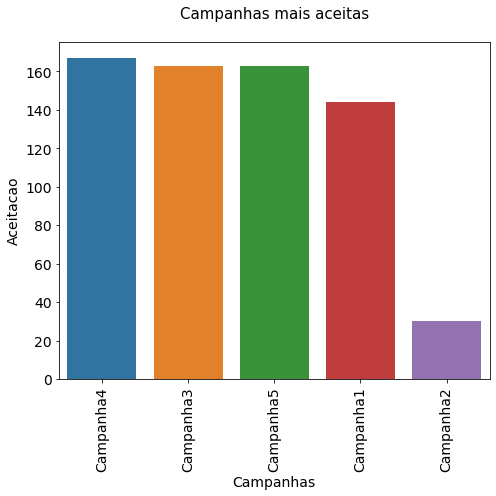

In [333]:
fig3, ax3 = plt.subplots(figsize=(7,7))

sns.barplot(x='Campanhas', y="Aceitacao", data = df_campanhas, 
            order = df_campanhas.sort_values('Aceitacao', ascending = False).Campanhas)

ax3.set_title("Campanhas mais aceitas\n", fontdict={'fontsize':15})
ax3.set_xlabel('Campanhas', fontdict={'fontsize':14})
ax3.set_ylabel('Aceitacao', fontdict={'fontsize':14})
ax3.tick_params(labelsize=14)
ax3.set_xticklabels(ax3.get_xticklabels(),rotation = 90)
fig3.tight_layout();

Obs.: A campanha 2 teve a menor aceitação

#### 4.2. Quantidade de campanhas aceitas pelos clientes

In [334]:
df['TotalPromocoesAceitas'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df['TotalPromocoesAceitas'].value_counts()

0    1777
1     325
2      83
3      44
4      11
Name: TotalPromocoesAceitas, dtype: int64

Text(0.5, 1.0, 'Quantidade de promoções aceitas pelos clientes \n')

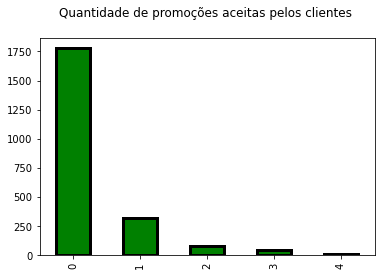

In [335]:
df['TotalPromocoesAceitas'].value_counts().plot(kind='bar', color = 'green', edgecolor = "black", linewidth = 3)
plt.title("Quantidade de promoções aceitas pelos clientes \n")

In [336]:
promo0 = df['TotalPromocoesAceitas'].value_counts()[0]
promo1 = df['TotalPromocoesAceitas'].value_counts()[1]
promo2 = df['TotalPromocoesAceitas'].value_counts()[2]
promo3 = df['TotalPromocoesAceitas'].value_counts()[3]
promo4 = df['TotalPromocoesAceitas'].value_counts()[4]

total = promo0 + promo1 + promo2 + promo3 + promo4

print('Agora sabemos que:\n')
print (round((promo0/total)*100, 2), '% dos clientes não aceitaram as ofertas')
print (round((promo1/total)*100, 2), '% dos clientes aceitaram 1 oferta')
print (round((promo2/total)*100, 2), '% dos clientes aceitaram 2 ofertas')
print (round((promo3/total)*100, 2), '% dos clientes aceitaram 3 ofertas')
print (round((promo4/total)*100, 2), '% dos clientes aceitaram 4 ofertas')
      

Agora sabemos que:

79.33 % dos clientes não aceitaram as ofertas
14.51 % dos clientes aceitaram 1 oferta
3.71 % dos clientes aceitaram 2 ofertas
1.96 % dos clientes aceitaram 3 ofertas
0.49 % dos clientes aceitaram 4 ofertas


#### 4.3. Compras realizadas com desconto

In [337]:
df['NumDealsPurchases']

0       3
1       2
2       1
3       2
4       5
       ..
2235    2
2236    7
2237    1
2238    2
2239    3
Name: NumDealsPurchases, Length: 2240, dtype: int64

In [338]:
df['NumDealsPurchases'].value_counts()

1     970
2     497
3     297
4     189
5      94
6      61
0      46
7      40
8      14
9       8
15      7
10      5
11      5
12      4
13      3
Name: NumDealsPurchases, dtype: int64

In [339]:
df['NumDealsPurchases'].describe()

count    2240.000000
mean        2.325000
std         1.932238
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64

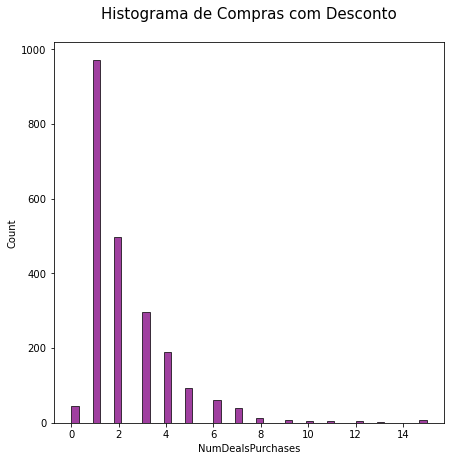

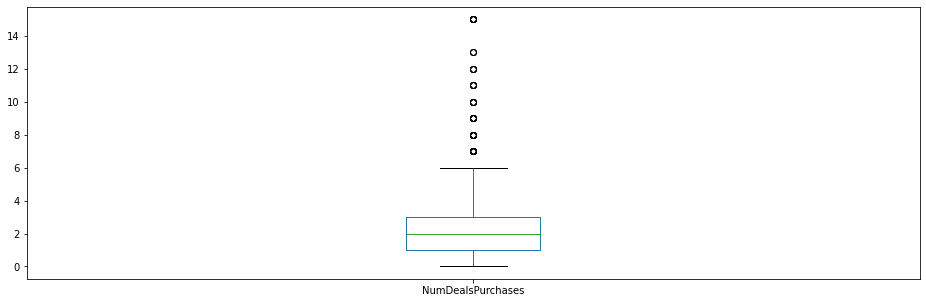

In [340]:
fig4, ax4 = plt.subplots(figsize=(7,7))

sns.histplot(df["NumDealsPurchases"],color = 'purple')
ax4.set_title("Histograma de Compras com Desconto\n", fontdict={'fontsize':15})
plt.show()

df["NumDealsPurchases"].plot.box(figsize=(16,5))
plt.show()

### 5. Analisando as variáveis do grupo canais de vendas
_____________________

#### 5.1 Canais de vendas que mais vendem

In [341]:
df.iloc[:,16:19]

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,8,10,4
1,1,1,2
2,8,2,10
3,2,0,4
4,5,3,6
...,...,...,...
2235,9,3,4
2236,8,2,5
2237,2,3,13
2238,6,5,10


In [342]:
df['NumWebPurchases'].value_counts()

2     373
1     354
3     336
4     280
5     220
6     205
7     155
8     102
9      75
0      49
11     44
10     43
27      2
23      1
25      1
Name: NumWebPurchases, dtype: int64

In [343]:
df['NumWebPurchases'].describe()

count    2240.000000
mean        4.084821
std         2.778714
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64

In [344]:
vendas_web = df['NumWebPurchases'].sum()
vendas_web

9150

In [345]:
df['NumCatalogPurchases'].value_counts()

0     586
1     497
2     276
3     184
4     182
5     140
6     128
7      79
8      55
10     48
9      42
11     19
28      3
22      1
Name: NumCatalogPurchases, dtype: int64

In [346]:
df['NumCatalogPurchases'].describe()

count    2240.000000
mean        2.662054
std         2.923101
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: NumCatalogPurchases, dtype: float64

In [347]:
vendas_catalogo = df['NumCatalogPurchases'].sum()
vendas_catalogo

5963

In [348]:
df['NumStorePurchases'].value_counts()

3     490
4     323
2     223
5     212
6     178
8     149
7     143
10    125
9     106
12    105
13     83
11     81
0      15
1       7
Name: NumStorePurchases, dtype: int64

In [349]:
df['NumStorePurchases'].describe()

count    2240.000000
mean        5.790179
std         3.250958
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: NumStorePurchases, dtype: float64

In [350]:
vendas_loja = df['NumStorePurchases'].sum()
vendas_loja

12970

In [351]:
canais_vendas = ['Web', 'Catalogo', 'Loja Fisica']
qtd_vendas = [df['NumWebPurchases'].sum(),
           df['NumCatalogPurchases'].sum(),
           df['NumStorePurchases'].sum()]

vendas_canais = list(zip(canais_vendas, qtd_vendas))

df_vendas = pd.DataFrame(vendas_canais, columns=['Canais de Vendas', 'Qtd Vendas'])
df_vendas.sort_values('Qtd Vendas', ascending = False)

,Canais de Vendas,Qtd Vendas
2,Loja Fisica,12970
0,Web,9150
1,Catalogo,5963


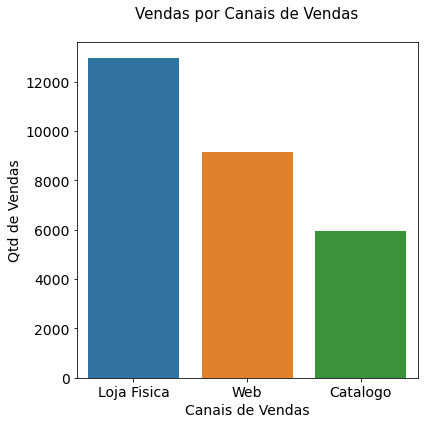

In [352]:
fig5, ax5 = plt.subplots(figsize=(6,6))

sns.barplot(x='Canais de Vendas', y="Qtd Vendas", data = df_vendas, 
            order = df_vendas.sort_values('Qtd Vendas', ascending = False)['Canais de Vendas'])

ax5.set_title("Vendas por Canais de Vendas\n", fontdict={'fontsize':15})
ax5.set_xlabel('Canais de Vendas', fontdict={'fontsize':14})
ax5.set_ylabel('Qtd de Vendas', fontdict={'fontsize':14})
ax5.tick_params(labelsize=14)
fig5.tight_layout();

In [416]:
total  = df_vendas["Qtd Vendas"].sum()
for i in range(len(df_vendas)):
    perc = (df_vendas["Qtd Vendas"][i] / total) * 100
    print('As vendas em',df_vendas['Canais de Vendas'][i], 'representam', round(perc, 2) ,'% do total de vendas')

As vendas em Web representam 32.58 % do total de vendas
As vendas em Catalogo representam 21.23 % do total de vendas
As vendas em Loja Fisica representam 46.18 % do total de vendas


#### 5.2. Analisando as visitas ao site no último mês

In [353]:
df['NumWebVisitsMonth'].value_counts()

7     393
8     342
6     340
5     281
4     218
3     205
2     202
1     153
9      83
0      11
10      3
20      3
14      2
19      2
13      1
17      1
Name: NumWebVisitsMonth, dtype: int64

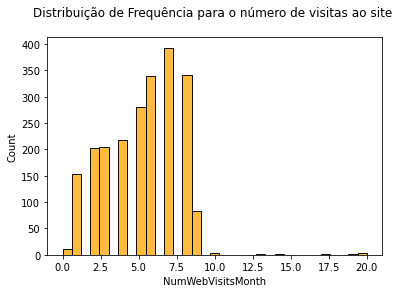

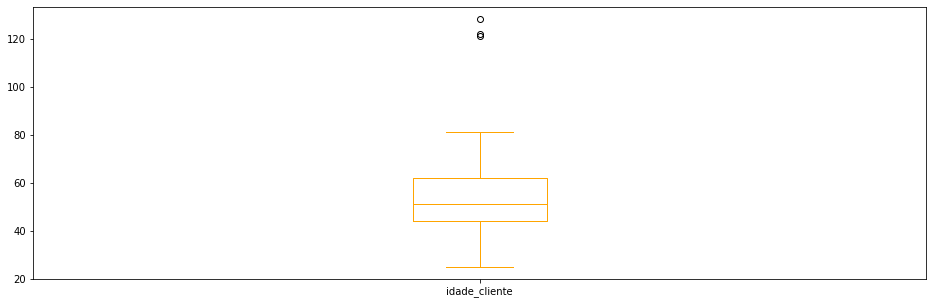

In [354]:
sns.histplot(df["NumWebVisitsMonth"], color = 'orange')
plt.title("Distribuição de Frequência para o número de visitas ao site \n")
plt.show()

df["idade_cliente"].plot.box(figsize=(16,5), color = 'orange')
plt.show()

### 6. Analisando as correlações
_____________________

#### 6.1. Testando Hipóteses

O objetivo aqui é validar algumas hipóteses.

##### Hipótese 1: O nível de escolaridade do cliente afeta positivamente o Total gasto em Compras?

In [355]:
# Variável Educação vs TotalCompras
pd.crosstab(df['Education'],df['TotalCompras'],margins=True)

TotalCompras,5,6,8,9,10,11,12,13,14,15,...,2283,2302,2346,2349,2352,2440,2486,2524,2525,All
Education,,,,,,,,,,,,,,,,,,,,,
Nível Médio,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,54
Nível Superior,1,2,4,2,5,5,2,6,2,10,...,1,2,1,1,1,1,1,1,2,2186
All,1,2,4,2,5,5,2,6,3,10,...,1,2,1,1,1,1,1,1,2,2240


In [356]:
import plotly.express as px

df_edu = df[['Education', 'TotalCompras']]

fig = px.bar(df_edu, x='Education', y='TotalCompras', color = 'Education')
fig.show()

Hipótese 1 confirmada, o que era previsível já que cerca de 98% dos clientes da base de dados possuiem nível superior.

##### Hipótese 2: O estado civil do cliente afeta o Total gasto em compras?

In [357]:
# Variável Educação vs TotalCompras
pd.crosstab(df['Marital_Status'],df['TotalCompras'],margins=True)

TotalCompras,5,6,8,9,10,11,12,13,14,15,...,2283,2302,2346,2349,2352,2440,2486,2524,2525,All
Marital_Status,,,,,,,,,,,,,,,,,,,,,
Em relacionamento,0,0,3,2,4,4,2,3,1,6,...,1,2,1,0,1,1,1,1,0,1444
Solteiro,1,2,1,0,1,1,0,3,2,4,...,0,0,0,1,0,0,0,0,2,796
All,1,2,4,2,5,5,2,6,3,10,...,1,2,1,1,1,1,1,1,2,2240


In [358]:
import plotly.express as px

df_edu = df[['Marital_Status', 'TotalCompras']]

fig = px.bar(df_edu, x='Marital_Status', y='TotalCompras', color = 'Marital_Status')
fig.show()

Hipotese 2 confirmada, podemos observar que os clientes em relacionamento compram mais do que os clientes solteiros.

#### 6.2. Matriz Correlação

O objetivo aqui é encontrar as variáveis que possuem uma correlação forte com o Total de Compras, ou seja, quais as características dos clientes que impactam em suas compras.

In [359]:
## Criando uma cópia do Dataset
df_corr = df.copy()

## Excluindo as colunas que não interessam para análise das correlações
df_corr = df.drop(columns=["ID", "Education", "Marital_Status", "Dt_Customer", "Year_Birth", "Recency","Response", "Kidhome", "Teenhome", "MntWines", 
                           "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds",
                           "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4",
                           "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumCatalogPurchases", 
                           "NumStorePurchases"],axis=1)

df_corr

,Income,NumWebVisitsMonth,Complain,idade_cliente,Antiguidade,Dependentes,TotalCompras,TotalPromocoesAceitas
0,58138.0,7,0,64,9,0,1617,0
1,46344.0,5,0,67,7,2,27,0
2,71613.0,4,0,56,8,0,776,0
3,26646.0,6,0,37,7,1,53,0
4,58293.0,5,0,40,7,1,422,0
...,...,...,...,...,...,...,...,...
2235,61223.0,5,0,54,8,1,1341,0
2236,64014.0,7,0,75,7,3,444,1
2237,56981.0,6,0,40,7,0,1241,1
2238,69245.0,3,0,65,7,1,843,0


In [360]:
#Criando a matriz correlação
matriz_corr = df_corr.corr()
matriz_corr

,Income,NumWebVisitsMonth,Complain,idade_cliente,Antiguidade,Dependentes,TotalCompras,TotalPromocoesAceitas
Income,1.000000,-0.549785,-0.027187,0.160899,-0.022381,-0.290858,0.664775,0.307122
NumWebVisitsMonth,-0.549785,1.000000,0.019769,-0.121139,0.249489,0.418419,-0.500218,-0.166345
Complain,-0.027187,0.019769,1.000000,0.030128,0.024304,0.031066,-0.037058,-0.022220
idade_cliente,0.160899,-0.121139,0.030128,1.000000,-0.028188,0.090199,0.111306,0.000301
Antiguidade,-0.022381,0.249489,0.024304,-0.028188,1.000000,-0.032215,0.144235,-0.021390
Dependentes,-0.290858,0.418419,0.031066,0.090199,-0.032215,1.000000,-0.498888,-0.244282
TotalCompras,0.664775,-0.500218,-0.037058,0.111306,0.144235,-0.498888,1.000000,0.459554
TotalPromocoesAceitas,0.307122,-0.166345,-0.022220,0.000301,-0.021390,-0.244282,0.459554,1.000000


<AxesSubplot:>

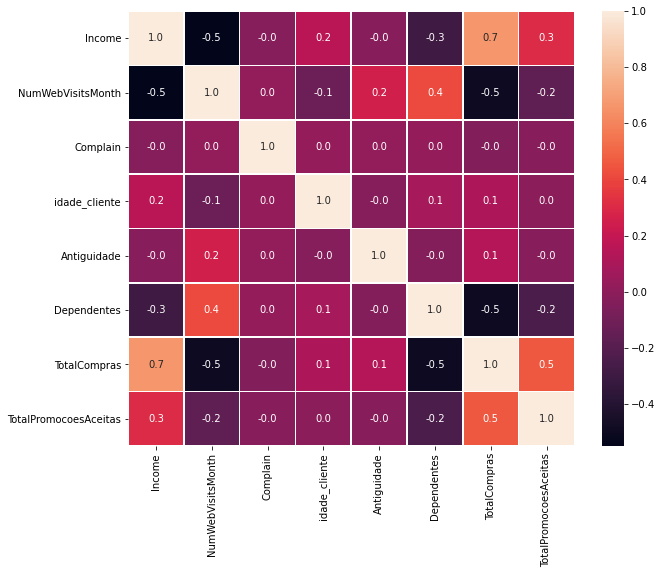

In [361]:
plt.figure(figsize=(10,8))
sns.heatmap(matriz_corr, annot = True, fmt=".1f", linewidths=.6)

<b>Conclusão das correlações</b>

Para a variável <b>TotalCompras</b> observamos que:
<ul>
    <li>A correlação mais forte acontece com a variável Income (Renda Familiar), o que é de se esperar, pois é intuitivo pensar que quanto maior a renda familiar, mais o cliente compra.</li>
    <li>Há uma correlação moderada com a variável TotalPromocoesAceitas, indicando que as promoções alavancam as compras.</li>
    <li>Interessante observar a correlação com a variável NumWebVisitsMonth (Número de visitas ao site no último mês), pois trata-se de uma correlação moderada negativa (-0,5), ou seja, quem mais visitou o site no último mês, comprou menos. </li>
    <li>Com a variável Dependentes, também há uma correlação moderada negativa (-0,5), indicando que quanto maior o número de pedendentes menos se compra.</li>
    <li>Não há correlação com as variáveis Complain (reclamações nos últimos 2 anos), Idade_Cliente e Antiguidade (há quanto tempo é cliente).</li>
</ul>

## Conclusão da Primeira Etapa
______

Nesta primeira etapa realizei o pré-processamento da base de dados com o objetivo de:
<ul>
    <li>Encontrar os valores nulos;</li>
    <li>Preencher os valores nulos. No caso deste projeto, os valores nulos foram preenchidos com a média do atributo;</li>
    <li>Exclusão de colunas com valores únicos.</li>
</ul>

Em seguida realizei uma análise exploratória dos dados, obtendo as seguintes descobertas:
<ul>
    <li>Apesar da idade média dos clientes ser de 52 anos, podemos observar uma concentração maior de clientes na faixa etária entre 45 a 50 anos;</li>
    <li>A base de dados é composta por clientes antigos possuido de 8 a 9 anos de casa, sendo a maioria clientes a 8 anos
        <ul>
            <li> 53.08 % são clientes a 8 anos </li>
            <li> 24.87 % são clientes a 7 anos </li>
            <li> 22.05 % são clientes a 9 anos </li>
         </ul>
      </li>
    <li>Observamos que 97.59 % dos clientes possuem Nível Superior enquanto que 2.41 % dos clientes possuem Nível Médio;</li>
    <li>Além disso, constatamos que 64.46 % dos clientes estão em relacionamento enquanto que 35.54 % dos clientes estão solteiros; </li>
    <li>A renda familiar média anual dos clientes é em torno de 51.963,00;</li>
    <li>Em relação a filhos, os clientes estão distribuídos da seguinte forma:
          <ul>
            <li> 28.48 % dos clientes não possuem dependentes </li>
            <li> 50.36 % dos clientes possuem apenas 1 dependente </li>
            <li> 18.79 % dos clientes possuem 2 dependentes </li>
            <li> 2.37 % dos clientes possuem 3 dependentes </li>   
         </ul>
    <li>Observamos que não há muitas ocorrências de reclamações, apenas 0.94 % dos clientes reclamaram nos últimos 2 anos. Apesar da baixa incidência de reclamações, seria interessante aprofundar o estudo e identificar qual o perfil do cliente que reclama.</li>
</ul>

<ul>
    <li>O gasto médio em compras é em torno de 600,00;</li>
    <li>O produto que mais gera receita são os vinhos seguidos das carnes, representando 77.73 % da receita em vendas;
    <li>Das cinco campanhas realizadas, a campanha 2 obteve a menor aceitação, ficando bem aquém das demais;</li>
    <li>Porém a maioria dos clientes não aderiram a campanha alguma, ficando distribuídos da seguinte forma:
          <ul>
            <li> 79.33 % dos clientes não aderiram à campanha alguma </li>
            <li> 14.51 % dos clientes aderiram somente a 1 campanha </li>
            <li> 3.71 % dos clientes aderiram a 2 campanhas </li>
            <li> 1.96 % dos clientes aderiu a 3 campanhas </li>  
            <li> 0.49 % dos clientes aderiu a 4 campanhas </li>  
            <li> Nenhum dos clientes aderiu às 5 campanhas </li>  
         </ul>
      </li>
    <li>O canal de vendas que contém o maior número de vendas ainda é a loja física, sendo o volume de vendas distribuído da seguinte forma: </li>
        <ul>
            <li> A Loja Fisica representa 46.18 % do total de vendas </li>
            <li> A Web representa 32.58 % do total de vendas </li>
            <li> O Catalogo representa 21.23 % do total de vendas </li>
         </ul>
    


</ul>